In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial 
import seaborn as sns
import random
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import xgboost
from xgboost import XGBClassifier, XGBRegressor, plot_importance
import catboost
from catboost import CatBoostClassifier,CatBoostRegressor, Pool, metrics, cv


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.inspection import plot_partial_dependence

In [26]:
data2= pd.read_csv("/Users/baeknarim/2022_1/데이터마이닝/팀플/data/total4_사고건수별_사망자수추가변수.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371925 entries, 0 to 371924
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   지점명          371925 non-null  object 
 1   발생년          371925 non-null  int64  
 2   요일           371925 non-null  object 
 3   사망자수         371925 non-null  int64  
 4   사상자수         371925 non-null  int64  
 5   중상자수         371925 non-null  int64  
 6   경상자수         371925 non-null  int64  
 7   부상신고자수       371925 non-null  int64  
 8   도로종류         371925 non-null  object 
 9   노면상태         371925 non-null  object 
 10  사고유형         371925 non-null  object 
 11  가해자_법규위반     371925 non-null  object 
 12  도로형태         371925 non-null  object 
 13  가해자_당사자종별    371925 non-null  object 
 14  피해자_당사자종별    371925 non-null  object 
 15  기온..C.       371925 non-null  float64
 16  강수량.mm.      371925 non-null  float64
 17  풍속.m.s.      371925 non-null  float64
 18  풍향.16방위.     371925 non-

# Xgboost

In [70]:
#지점명, 발생년, 요일, 도로종류, 노면상태, 사고유형, 가해자_법규위반, 도로형태,가해자_당사자종별, 피해자_당사자종별, 발생시간분류
#  label encoding - 
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()
le9=LabelEncoder()
le10=LabelEncoder()
le11=LabelEncoder()

le1.fit(data2["지점명"])
data2["지점명"]= le1.transform(data2["지점명"])

le2.fit(data2["발생년"])
data2["발생년"]= le2.transform(data2["발생년"])

le3.fit(data2["요일"])
data2["요일"]= le3.transform(data2["요일"])

le4.fit(data2["도로종류"])
data2["도로종류"]= le4.transform(data2["도로종류"])

le5.fit(data2["노면상태"])
data2["노면상태"]= le5.transform(data2["노면상태"])

le6.fit(data2["사고유형"])
data2["사고유형"]= le6.transform(data2["사고유형"])

le7.fit(data2["도로형태_대분류"])
data2["도로형태_대분류"]= le7.transform(data2["도로형태_대분류"])

le8.fit(data2["가해자_법규위반"])
data2["가해자_법규위반"]= le8.transform(data2["가해자_법규위반"])

le9.fit(data2["도로형태"])
data2["도로형태"]= le9.transform(data2["도로형태"])

le10.fit(data2["가해자_당사자종별"])
data2["가해자_당사자종별"]= le10.transform(data2["가해자_당사자종별"])

le11.fit(data2["피해자_당사자종별"])
data2["피해자_당사자종별"]= le11.transform(data2["피해자_당사자종별"])

le12.fit(data2["발생시간분류"])
data2["발생시간분류"]= le12.transform(data2["발생시간분류"])

data2.info()

KeyError: '도로형태_대분류'

# y : 사상자수 regression

In [28]:

print(sum(data2["사상자수"]==1))
print(sum(data2["사상자수"]==2))
print(sum(data2["사상자수"]==3))
print(sum(data2["사상자수"]==4))
print(sum(data2["사상자수"]==5))
print(sum(data2["사상자수"]==6))
print(sum(data2["사상자수"]==7))
print(sum(data2["사상자수"]==8))

274201
61568
20554
8531
3657
1575
707
372


In [29]:
X = data2.drop(["사망자수","중상자수","사상자수","경상자수","부상신고자수","NX4"], axis=1)
y = data2["사상자수"]


In [30]:
#train, test suffle (0.2)

train_x, test_x, train_y, test_y = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1234)
                                                    
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(297540, 21) (74385, 21) (297540,) (74385,)


In [31]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297540 entries, 347505 to 165158
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   지점명          297540 non-null  int64  
 1   발생년          297540 non-null  int64  
 2   요일           297540 non-null  int64  
 3   도로종류         297540 non-null  int64  
 4   노면상태         297540 non-null  int64  
 5   사고유형         297540 non-null  int64  
 6   가해자_법규위반     297540 non-null  int64  
 7   도로형태         297540 non-null  int64  
 8   가해자_당사자종별    297540 non-null  int64  
 9   피해자_당사자종별    297540 non-null  int64  
 10  기온..C.       297540 non-null  float64
 11  강수량.mm.      297540 non-null  float64
 12  풍속.m.s.      297540 non-null  float64
 13  풍향.16방위.     297540 non-null  float64
 14  습도...        297540 non-null  float64
 15  증기압.hPa.     297540 non-null  float64
 16  현지기압.hPa.    297540 non-null  float64
 17  적설.cm.       297540 non-null  float64
 18  X3시간신적설.cm.  297540

In [32]:
##################################cv#################################
start= time.time() 
xgb = XGBClassifier()

xgb_grid={
    'max_depth':[2,6], 
    'n_estimators':[500,1000],
    'learning_rate':[0.05,0.1], 
    'random_state':[1234]
}

xgbCV=GridSearchCV(xgb, xgb_grid, verbose=2) 
xgbCV.fit(train_x, train_y)
print("실행시간 :{}".format(time.time()-start)) 
print(xgbCV.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=1000, random_state=1234; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=1000, random_state=1234; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=1000, random_state=1234; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators=1000, random_state=1234; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, n_estimators

ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 31 32 37 39 42 43 46 50 51]

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29 31 32 33 35 37 39 42 46 50 51]

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 31 32 33 35 37 39 42 43 46 51]

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 31 33 35 37 39 42 43 46 50]

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/baeknarim/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 27 29 31 32 33 35 37 39 43 50 51]


In [33]:
#modeling 
start=time.time()

xgb_re=xgboost.XGBRegressor(random_state=1234)
xgb_re.fit(train_x,train_y) 
print("실행시간:[]".format(time.time()-start))

pred_y = xgb_re.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred_y)) 
print("RMSE: %f" % (rmse))


실행시간:[]
RMSE: 0.995971


In [42]:
plt.rcParams['font.family'] = 'Malgun Gothic'

Text(0.5, 1.0, 'Feature importance')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


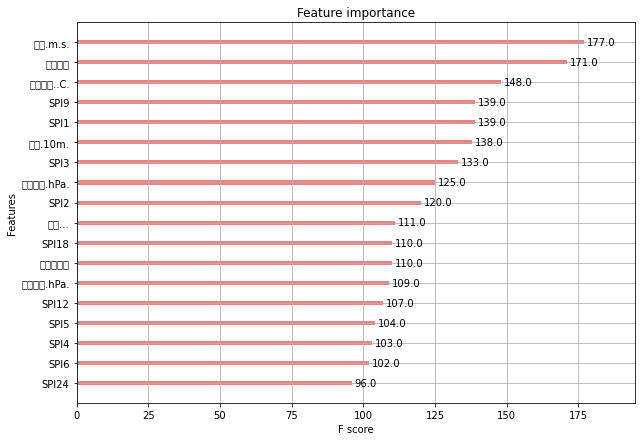

In [43]:
#feature importance
fig, ax=plt.subplots(1,1,figsize=(10,7))
plot_importance(xgb_cl, ax=ax, color="lightcoral", max_num_features=18) 
plt.title("Feature importance")


In [46]:
#pdp
plot_partial_dependence(xgb_cl, features=['피해자_당사자종별_대분류_승용차','가해자_법규위반_과속','가채자_당사종별_대분류_승용차'],X=train_x)

# y : NX4

In [34]:

X = data2.drop(["사망자수","중상자수","사상자수","경상자수","부상신고자수","NX4"], axis=1)
y = data2["NX4"]


In [35]:

train_x, test_x, train_y, test_y = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1234)
                                                    
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(297540, 21) (74385, 21) (297540,) (74385,)


In [36]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297540 entries, 347505 to 165158
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   지점명          297540 non-null  int64  
 1   발생년          297540 non-null  int64  
 2   요일           297540 non-null  int64  
 3   도로종류         297540 non-null  int64  
 4   노면상태         297540 non-null  int64  
 5   사고유형         297540 non-null  int64  
 6   가해자_법규위반     297540 non-null  int64  
 7   도로형태         297540 non-null  int64  
 8   가해자_당사자종별    297540 non-null  int64  
 9   피해자_당사자종별    297540 non-null  int64  
 10  기온..C.       297540 non-null  float64
 11  강수량.mm.      297540 non-null  float64
 12  풍속.m.s.      297540 non-null  float64
 13  풍향.16방위.     297540 non-null  float64
 14  습도...        297540 non-null  float64
 15  증기압.hPa.     297540 non-null  float64
 16  현지기압.hPa.    297540 non-null  float64
 17  적설.cm.       297540 non-null  float64
 18  X3시간신적설.cm.  297540

In [ ]:
#################################cv#################################
start= time.time() 
xgb = XGBClassifier()

xgb_grid={
    'max_depth':[2,4,6], 
    'colsample_bytree':[0.6,0.8],
    'gamma':[0.1,0.5,1],
    'min_child_weight':[0.5,1],
    'n_estimators':[500,1000],
    'learning_rate':[0.05,0.1], 
    'random_state':[1234]
}

xgbCV=GridSearchCV(xgb, xgb_grid, verbose=2) 
xgbCV.fit(train_x, train_y)
print("실행시간 :{}".format(time.time()-start)) 
print(xgbCV.best_params_)



In [37]:
#modeling 
start=time.time()

xgb_re=xgboost.XGBRegressor(random_state=1234)
xgb_re.fit(train_x,train_y) 
print("실행시간:[]".format(time.time()-start))

pred_y = xgb_re.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred_y)) 
print("RMSE: %f" % (rmse))



실행시간:[]
RMSE: 0.124558


Text(0.5, 1.0, 'Feature importance')

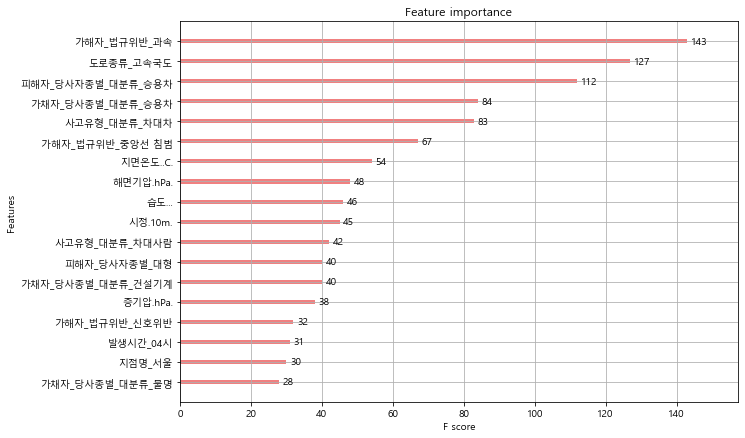

In [19]:
#feature importance
fig, ax=plt.subplots(1,1,figsize=(10,7))
plot_importance(xgb_cl, ax=ax, color="lightcoral", max_num_features=18) 
plt.title("Feature importance")



In [20]:
#pdp
#plot_partial_dependence(xgb_cl, features=['가해자_법규위반_과속','도로종류_고속국도','피해자_당사자종별_대분류_승용차'],X=train_x)


#pdp
plot_partial_dependence(xgb_cl, features=['피해자_당사자종별_대분류_승용차','가해자_법규위반_과속','가채자_당사종별_대분류_승용차'],X=train_x)

ValueError: target must be specified for multi-class

# Catboost

In [40]:
data= pd.read_csv("/Users/baeknarim/2022_1/데이터마이닝/팀플/data/total4_사고건수별_사망자수추가변수.csv")

data=data.astype({"발생년":object,"발생시간분류":object})



In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371925 entries, 0 to 371924
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   지점명          371925 non-null  object 
 1   발생년          371925 non-null  object 
 2   요일           371925 non-null  object 
 3   사망자수         371925 non-null  int64  
 4   사상자수         371925 non-null  int64  
 5   중상자수         371925 non-null  int64  
 6   경상자수         371925 non-null  int64  
 7   부상신고자수       371925 non-null  int64  
 8   도로종류         371925 non-null  object 
 9   노면상태         371925 non-null  object 
 10  사고유형         371925 non-null  object 
 11  가해자_법규위반     371925 non-null  object 
 12  도로형태         371925 non-null  object 
 13  가해자_당사자종별    371925 non-null  object 
 14  피해자_당사자종별    371925 non-null  object 
 15  기온..C.       371925 non-null  float64
 16  강수량.mm.      371925 non-null  float64
 17  풍속.m.s.      371925 non-null  float64
 18  풍향.16방위.     371925 non-

In [42]:
data["지점명"]=data["지점명"].astype('category')
data["발생년"]=data["발생년"].astype('category')
data["요일"]=data["요일"].astype('category')
data["도로종류"]=data["도로종류"].astype('category')
data["노면상태"]=data["노면상태"].astype('category')
data["사고유형"]=data["사고유형"].astype('category')
data["사고유형_대분류"]=data["사고유형_대분류"].astype('category')
data["가해자_법규위반"]=data["가해자_법규위반"].astype('category')
data["도로형태"]=data["도로형태"].astype('category')
data["가해자_당사자종별"]=data["가해자_당사자종별"].astype('category')
data["피해자_당사자종별"]=data["피해자_당사자종별"].astype('category')
data["발생시간분류"]=data["발생시간분류"].astype('category')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371925 entries, 0 to 371924
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   지점명          371925 non-null  category
 1   발생년          371925 non-null  category
 2   요일           371925 non-null  category
 3   사망자수         371925 non-null  int64   
 4   사상자수         371925 non-null  int64   
 5   중상자수         371925 non-null  int64   
 6   경상자수         371925 non-null  int64   
 7   부상신고자수       371925 non-null  int64   
 8   도로종류         371925 non-null  category
 9   노면상태         371925 non-null  category
 10  사고유형         371925 non-null  category
 11  가해자_법규위반     371925 non-null  category
 12  도로형태         371925 non-null  category
 13  가해자_당사자종별    371925 non-null  category
 14  피해자_당사자종별    371925 non-null  category
 15  기온..C.       371925 non-null  float64 
 16  강수량.mm.      371925 non-null  float64 
 17  풍속.m.s.      371925 non-null  float64 
 18  풍향.1

# y : 사상자수

In [ ]:
X = data.drop(["사망자수","중상자수","사상자수","경상자수","부상신고자수","NX4"], axis=1)
y = data["사상자수"]

In [ ]:

train_x, test_x, train_y, test_y = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1234)
                                                    
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

In [ ]:
train_x.info()

In [53]:
#cols names
cat_cols = train_x.columns[train_x.dtypes=='category'].to_list() 
num_cols = train_x.columns[train_x.dtypes!='category'].to_list() 
cat_cols


['지점명',
 '발생년',
 '요일',
 '도로종류',
 '노면상태',
 '사고유형',
 '가해자_법규위반',
 '도로형태',
 '가해자_당사자종별',
 '피해자_당사자종별',
 '발생시간분류']

In [54]:
##################################cv#################################
#grid search
start=time.time() 
clr=catboost.CatBoostClassifier(loss_function="Logloss",boosting_type="Ordered",cat_features=cat_cols)

clr_grid={
    'max_depth':[2,4,6], 
    'border_count':[64,254], 
    'rsm' :[0.5,0.85], 
    'l2_leaf_reg':[0.1,0.5,1], 
    'n_estimators':[500,1000], 
    'learning_rate':[0.05,0.1], 
    'random_state':[1234]
}
clrCV=GridSearchCV(clr, clr_grid, verbose=2) 
clrCV.fit(train_x, train_y)
print("실행시간 :{}".format(time.time()-start)) 
print(clrCV.best_params_)



Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END border_count=64, l2_leaf_reg=0.1, learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234, rsm=0.5; total time=   0.2s
[CV] END border_count=64, l2_leaf_reg=0.1, learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234, rsm=0.5; total time=   0.2s
[CV] END border_count=64, l2_leaf_reg=0.1, learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234, rsm=0.5; total time=   0.2s
[CV] END border_count=64, l2_leaf_reg=0.1, learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234, rsm=0.5; total time=   0.2s
[CV] END border_count=64, l2_leaf_reg=0.1, learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234, rsm=0.5; total time=   0.2s
[CV] END border_count=64, l2_leaf_reg=0.1, learning_rate=0.05, max_depth=2, n_estimators=500, random_state=1234, rsm=0.85; total time=   0.2s
[CV] END border_count=64, l2_leaf_reg=0.1, learning_rate=0.05, max_depth=2, n_estimators=5

KeyboardInterrupt: 

In [57]:
#modeling
start=time.time() 

clr_re=catboost.CatBoostRegressor(random_state= 1234)
clr_re.fit(train_x,train_y, verbose=True, cat_features=cat_cols)
print("실행시간:[]".format(time.time()-start))

pred_y = clr_re.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE: %f" % (rmse))


Learning rate set to 0.100693
0:	learn: 1.0425244	total: 69.6ms	remaining: 1m 9s
1:	learn: 1.0343240	total: 127ms	remaining: 1m 3s
2:	learn: 1.0274107	total: 180ms	remaining: 59.8s
3:	learn: 1.0215998	total: 241ms	remaining: 1m
4:	learn: 1.0167175	total: 294ms	remaining: 58.5s
5:	learn: 1.0125348	total: 348ms	remaining: 57.7s
6:	learn: 1.0090135	total: 396ms	remaining: 56.2s
7:	learn: 1.0061875	total: 449ms	remaining: 55.7s
8:	learn: 1.0033674	total: 523ms	remaining: 57.6s
9:	learn: 1.0009144	total: 572ms	remaining: 56.7s
10:	learn: 0.9988782	total: 629ms	remaining: 56.5s
11:	learn: 0.9970911	total: 688ms	remaining: 56.7s
12:	learn: 0.9956364	total: 737ms	remaining: 56s
13:	learn: 0.9944519	total: 782ms	remaining: 55.1s
14:	learn: 0.9933685	total: 828ms	remaining: 54.4s
15:	learn: 0.9923761	total: 888ms	remaining: 54.6s
16:	learn: 0.9915571	total: 947ms	remaining: 54.8s
17:	learn: 0.9908875	total: 1.02s	remaining: 55.7s
18:	learn: 0.9903193	total: 1.07s	remaining: 55.5s
19:	learn: 0.98

161:	learn: 0.9694821	total: 13.3s	remaining: 1m 8s
162:	learn: 0.9693872	total: 13.3s	remaining: 1m 8s
163:	learn: 0.9693849	total: 13.4s	remaining: 1m 8s
164:	learn: 0.9693700	total: 13.5s	remaining: 1m 8s
165:	learn: 0.9691956	total: 13.6s	remaining: 1m 8s
166:	learn: 0.9691031	total: 13.7s	remaining: 1m 8s
167:	learn: 0.9690013	total: 13.8s	remaining: 1m 8s
168:	learn: 0.9689961	total: 13.9s	remaining: 1m 8s
169:	learn: 0.9689148	total: 14s	remaining: 1m 8s
170:	learn: 0.9689116	total: 14.1s	remaining: 1m 8s
171:	learn: 0.9688877	total: 14.2s	remaining: 1m 8s
172:	learn: 0.9688619	total: 14.3s	remaining: 1m 8s
173:	learn: 0.9688106	total: 14.4s	remaining: 1m 8s
174:	learn: 0.9688051	total: 14.5s	remaining: 1m 8s
175:	learn: 0.9686727	total: 14.6s	remaining: 1m 8s
176:	learn: 0.9686708	total: 14.7s	remaining: 1m 8s
177:	learn: 0.9686460	total: 14.7s	remaining: 1m 8s
178:	learn: 0.9686038	total: 14.8s	remaining: 1m 8s
179:	learn: 0.9685819	total: 14.9s	remaining: 1m 8s
180:	learn: 0.

321:	learn: 0.9641831	total: 27.9s	remaining: 58.7s
322:	learn: 0.9641614	total: 28s	remaining: 58.7s
323:	learn: 0.9641535	total: 28.1s	remaining: 58.5s
324:	learn: 0.9641416	total: 28.2s	remaining: 58.5s
325:	learn: 0.9641139	total: 28.3s	remaining: 58.4s
326:	learn: 0.9641111	total: 28.3s	remaining: 58.3s
327:	learn: 0.9640221	total: 28.4s	remaining: 58.3s
328:	learn: 0.9640147	total: 28.5s	remaining: 58.2s
329:	learn: 0.9640089	total: 28.6s	remaining: 58.1s
330:	learn: 0.9640044	total: 28.7s	remaining: 58s
331:	learn: 0.9639943	total: 28.8s	remaining: 57.9s
332:	learn: 0.9639908	total: 28.9s	remaining: 57.9s
333:	learn: 0.9639822	total: 29s	remaining: 57.8s
334:	learn: 0.9639773	total: 29.1s	remaining: 57.7s
335:	learn: 0.9639649	total: 29.2s	remaining: 57.7s
336:	learn: 0.9639563	total: 29.2s	remaining: 57.5s
337:	learn: 0.9639516	total: 29.3s	remaining: 57.4s
338:	learn: 0.9639388	total: 29.4s	remaining: 57.4s
339:	learn: 0.9639223	total: 29.5s	remaining: 57.3s
340:	learn: 0.9639

480:	learn: 0.9602710	total: 42.7s	remaining: 46.1s
481:	learn: 0.9602087	total: 42.8s	remaining: 46s
482:	learn: 0.9601988	total: 42.9s	remaining: 45.9s
483:	learn: 0.9601835	total: 43s	remaining: 45.8s
484:	learn: 0.9601671	total: 43.1s	remaining: 45.7s
485:	learn: 0.9601550	total: 43.2s	remaining: 45.6s
486:	learn: 0.9601534	total: 43.3s	remaining: 45.6s
487:	learn: 0.9601409	total: 43.3s	remaining: 45.5s
488:	learn: 0.9601268	total: 43.4s	remaining: 45.4s
489:	learn: 0.9600985	total: 43.5s	remaining: 45.3s
490:	learn: 0.9600971	total: 43.6s	remaining: 45.2s
491:	learn: 0.9600921	total: 43.7s	remaining: 45.1s
492:	learn: 0.9600897	total: 43.8s	remaining: 45s
493:	learn: 0.9600840	total: 43.9s	remaining: 44.9s
494:	learn: 0.9600839	total: 43.9s	remaining: 44.8s
495:	learn: 0.9600819	total: 44s	remaining: 44.7s
496:	learn: 0.9600562	total: 44.1s	remaining: 44.6s
497:	learn: 0.9599551	total: 44.2s	remaining: 44.5s
498:	learn: 0.9599501	total: 44.3s	remaining: 44.5s
499:	learn: 0.959948

640:	learn: 0.9574434	total: 57.4s	remaining: 32.2s
641:	learn: 0.9574353	total: 57.5s	remaining: 32.1s
642:	learn: 0.9573979	total: 57.6s	remaining: 32s
643:	learn: 0.9573854	total: 57.7s	remaining: 31.9s
644:	learn: 0.9573773	total: 57.8s	remaining: 31.8s
645:	learn: 0.9573668	total: 57.9s	remaining: 31.7s
646:	learn: 0.9573593	total: 57.9s	remaining: 31.6s
647:	learn: 0.9573046	total: 58s	remaining: 31.5s
648:	learn: 0.9573036	total: 58.1s	remaining: 31.4s
649:	learn: 0.9572979	total: 58.2s	remaining: 31.4s
650:	learn: 0.9571910	total: 58.3s	remaining: 31.3s
651:	learn: 0.9571823	total: 58.4s	remaining: 31.2s
652:	learn: 0.9571690	total: 58.5s	remaining: 31.1s
653:	learn: 0.9571597	total: 58.6s	remaining: 31s
654:	learn: 0.9571543	total: 58.7s	remaining: 30.9s
655:	learn: 0.9571505	total: 58.8s	remaining: 30.8s
656:	learn: 0.9571110	total: 58.9s	remaining: 30.7s
657:	learn: 0.9570876	total: 59s	remaining: 30.7s
658:	learn: 0.9570694	total: 59.1s	remaining: 30.6s
659:	learn: 0.957049

799:	learn: 0.9548313	total: 1m 12s	remaining: 18.1s
800:	learn: 0.9547931	total: 1m 12s	remaining: 18s
801:	learn: 0.9547869	total: 1m 12s	remaining: 17.9s
802:	learn: 0.9547616	total: 1m 12s	remaining: 17.8s
803:	learn: 0.9547611	total: 1m 12s	remaining: 17.7s
804:	learn: 0.9547228	total: 1m 12s	remaining: 17.6s
805:	learn: 0.9547167	total: 1m 12s	remaining: 17.5s
806:	learn: 0.9546795	total: 1m 12s	remaining: 17.5s
807:	learn: 0.9546714	total: 1m 13s	remaining: 17.4s
808:	learn: 0.9546683	total: 1m 13s	remaining: 17.3s
809:	learn: 0.9546613	total: 1m 13s	remaining: 17.2s
810:	learn: 0.9546210	total: 1m 13s	remaining: 17.1s
811:	learn: 0.9546089	total: 1m 13s	remaining: 17s
812:	learn: 0.9545964	total: 1m 13s	remaining: 16.9s
813:	learn: 0.9545896	total: 1m 13s	remaining: 16.8s
814:	learn: 0.9545886	total: 1m 13s	remaining: 16.7s
815:	learn: 0.9545840	total: 1m 13s	remaining: 16.6s
816:	learn: 0.9545821	total: 1m 13s	remaining: 16.5s
817:	learn: 0.9545815	total: 1m 13s	remaining: 16.

956:	learn: 0.9523021	total: 1m 27s	remaining: 3.92s
957:	learn: 0.9522977	total: 1m 27s	remaining: 3.83s
958:	learn: 0.9522710	total: 1m 27s	remaining: 3.74s
959:	learn: 0.9522429	total: 1m 27s	remaining: 3.65s
960:	learn: 0.9522406	total: 1m 27s	remaining: 3.56s
961:	learn: 0.9522257	total: 1m 27s	remaining: 3.47s
962:	learn: 0.9522086	total: 1m 27s	remaining: 3.38s
963:	learn: 0.9522034	total: 1m 28s	remaining: 3.29s
964:	learn: 0.9522003	total: 1m 28s	remaining: 3.19s
965:	learn: 0.9521927	total: 1m 28s	remaining: 3.1s
966:	learn: 0.9521679	total: 1m 28s	remaining: 3.01s
967:	learn: 0.9521197	total: 1m 28s	remaining: 2.92s
968:	learn: 0.9521146	total: 1m 28s	remaining: 2.83s
969:	learn: 0.9521053	total: 1m 28s	remaining: 2.74s
970:	learn: 0.9520959	total: 1m 28s	remaining: 2.65s
971:	learn: 0.9520749	total: 1m 28s	remaining: 2.56s
972:	learn: 0.9520484	total: 1m 28s	remaining: 2.46s
973:	learn: 0.9520447	total: 1m 28s	remaining: 2.37s
974:	learn: 0.9520401	total: 1m 28s	remaining: 

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(10,7))
temp = pd.DataFrame({'feature_importance':clr_cl.get_feature_importance(),
'feature_names':train_x.columns}).sort_values(by=["feature_importance"], ascending=False)
sns.barplot(x="feature_importance", y="feature_names", data=temp, color="lightcoral")
plt.title("Feature importance")

In [ ]:
#pdp
plot_partial_dependence(clr_cl, features=['피해자_당사자종별_대분류','가채자_당사종별_대분류','사고유형_대분류'],X=train_x)

# NX4

In [59]:
X = data.drop(["사망자수","중상자수","사상자수","경상자수","부상신고자수","NX4"], axis=1)
y = data["사상자수"]

In [60]:

train_x, test_x, train_y, test_y = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1234)
                                                    
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(297540, 21) (74385, 21) (297540,) (74385,)


In [61]:
#cols names
cat_cols = train_x.columns[train_x.dtypes=='category'].to_list() 
num_cols = train_x.columns[train_x.dtypes!='category'].to_list() 
cat_cols

['지점명',
 '발생년',
 '요일',
 '도로종류',
 '노면상태',
 '사고유형',
 '가해자_법규위반',
 '도로형태',
 '가해자_당사자종별',
 '피해자_당사자종별',
 '발생시간분류']

In [ ]:
#modeling

start=time.time() 

clr_re=catboost.CatBoostRegressor(random_state= 1234)
clr_re.fit(train_x,train_y, verbose=True, cat_features=cat_cols)
print("실행시간:[]".format(time.time()-start))

pred_y = clr_re.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE: %f" % (rmse))



In [ ]:
#feature importance
fig, ax=plt.subplots(1,1,figsize=(10,7))
temp = pd.DataFrame({'feature_importance':clr_cl.get_feature_importance(),
'feature_names':train_x.columns}).sort_values(by=["feature_importance"], ascending=False)
sns.barplot(x="feature_importance", y="feature_names", data=temp, color="lightcoral")
plt.title("Feature importance")



In [ ]:
#pdp
plot_partial_dependence(clr_cl, features=['시정.10m.','습도...'],X=train_x)

# LGBM

# y : 사상자수

In [62]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371925 entries, 0 to 371924
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   지점명          371925 non-null  int64  
 1   발생년          371925 non-null  int64  
 2   요일           371925 non-null  int64  
 3   사망자수         371925 non-null  int64  
 4   사상자수         371925 non-null  int64  
 5   중상자수         371925 non-null  int64  
 6   경상자수         371925 non-null  int64  
 7   부상신고자수       371925 non-null  int64  
 8   도로종류         371925 non-null  int64  
 9   노면상태         371925 non-null  int64  
 10  사고유형         371925 non-null  int64  
 11  가해자_법규위반     371925 non-null  int64  
 12  도로형태         371925 non-null  int64  
 13  가해자_당사자종별    371925 non-null  int64  
 14  피해자_당사자종별    371925 non-null  int64  
 15  기온..C.       371925 non-null  float64
 16  강수량.mm.      371925 non-null  float64
 17  풍속.m.s.      371925 non-null  float64
 18  풍향.16방위.     371925 non-

In [63]:

X = data2.drop(["사망자수","중상자수","사상자수","경상자수","부상신고자수","NX4"], axis=1)
y = data2["사상자수"]

In [64]:

train_x, test_x, train_y, test_y = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1234)
                                                    
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(297540, 21) (74385, 21) (297540,) (74385,)


In [65]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297540 entries, 347505 to 165158
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   지점명          297540 non-null  int64  
 1   발생년          297540 non-null  int64  
 2   요일           297540 non-null  int64  
 3   도로종류         297540 non-null  int64  
 4   노면상태         297540 non-null  int64  
 5   사고유형         297540 non-null  int64  
 6   가해자_법규위반     297540 non-null  int64  
 7   도로형태         297540 non-null  int64  
 8   가해자_당사자종별    297540 non-null  int64  
 9   피해자_당사자종별    297540 non-null  int64  
 10  기온..C.       297540 non-null  float64
 11  강수량.mm.      297540 non-null  float64
 12  풍속.m.s.      297540 non-null  float64
 13  풍향.16방위.     297540 non-null  float64
 14  습도...        297540 non-null  float64
 15  증기압.hPa.     297540 non-null  float64
 16  현지기압.hPa.    297540 non-null  float64
 17  적설.cm.       297540 non-null  float64
 18  X3시간신적설.cm.  297540

In [ ]:
####################################cv####################################
start=time.time()
lgm=LGBMClassifier()

lgm_grid={
    'num_leaves':[10,20],
    'max_depth':[-1,2,4,6,8],
    'min_data':[500,1000],
    'max_bin':[225,512],
    'n_estimators':[500,1000],
    'learning_rate':[0.05,0.1],
    'random_state':[1234]
}
lgmCV=GridSearchCV(lgm, lgm_grid, verbose=2)
lgmCV.fit(train_x, train_y)
print("실행시간 :{}".format(time.time()-start))
print(lgmCV.best_params_)

In [66]:
#modeling 
start=time.time()

lgm_re=lgm(random_state=1234)
lgm_re.fit(train_x,train_y) 
print("실행시간:[]".format(time.time()-start))

pred_y = lgm_re.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred_y)) 
print("RMSE: %f" % (rmse))



NameError: name 'lgm' is not defined

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(10,7))
plot_importance(lgm_cl, ax=ax, color="lightcoral", max_num_features=18)
plt.title("Feature importance")

In [ ]:
#pdp
plot_partial_dependence(lgm_cl, features=[],X=train_x)

# NX4

In [67]:

X = data2.drop(["사망자수","중상자수","사상자수","경상자수","부상신고자수","NX4"], axis=1)
y = data2["NX4"]

In [68]:
train_x, test_x, train_y, test_y = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1234)
                                                    
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(297540, 21) (74385, 21) (297540,) (74385,)


In [69]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297540 entries, 347505 to 165158
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   지점명          297540 non-null  int64  
 1   발생년          297540 non-null  int64  
 2   요일           297540 non-null  int64  
 3   도로종류         297540 non-null  int64  
 4   노면상태         297540 non-null  int64  
 5   사고유형         297540 non-null  int64  
 6   가해자_법규위반     297540 non-null  int64  
 7   도로형태         297540 non-null  int64  
 8   가해자_당사자종별    297540 non-null  int64  
 9   피해자_당사자종별    297540 non-null  int64  
 10  기온..C.       297540 non-null  float64
 11  강수량.mm.      297540 non-null  float64
 12  풍속.m.s.      297540 non-null  float64
 13  풍향.16방위.     297540 non-null  float64
 14  습도...        297540 non-null  float64
 15  증기압.hPa.     297540 non-null  float64
 16  현지기압.hPa.    297540 non-null  float64
 17  적설.cm.       297540 non-null  float64
 18  X3시간신적설.cm.  297540

In [ ]:
####################################cv####################################
start=time.time()
lgm=LGBMClassifier()

lgm_grid={
    'num_leaves':[10,20],
    'max_depth':[-1,2,4,6,8],
    'min_data':[500,1000],
    'max_bin':[225,512],
    'n_estimators':[500,1000],
    'learning_rate':[0.05,0.1],
    'random_state':[1234]
}
lgmCV=GridSearchCV(lgm, lgm_grid, verbose=2)
lgmCV.fit(train_x, train_y)
print("실행시간 :{}".format(time.time()-start))
print(lgmCV.best_params_)

In [ ]:
#modeling 
start=time.time()

lgm_re=lgm(random_state=1234)
lgm_re.fit(train_x,train_y) 
print("실행시간:[]".format(time.time()-start))

pred_y = lgm_re.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred_y)) 
print("RMSE: %f" % (rmse))



In [ ]:
fig, ax=plt.subplots(1,1,figsize=(10,7))
plot_importance(lgm_cl, ax=ax, color="lightcoral", max_num_features=18)
plt.title("Feature importance")

In [ ]:
#pdp
plot_partial_dependence(lgm_cl, features=[],X=train_x)